#Loading Data

In [0]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
train_data=pd.read_pickle('CleanedText')

In [0]:
train_data.head()

138706    witti littl book make son laugh loud recit car...
138683    rememb see show air televis year ago child sis...
417839    beetlejuic well written movi everyth excel act...
346055    twist rumplestiskin captur film star michael k...
417838    beetlejuic excel funni movi keaton hilari wack...
Name: CleanedText, dtype: object

#TF-IDF

In [0]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(train_data.head(60000))
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (60000, 29132)
the number of unique words including both unigrams and bigrams  29132


In [0]:
indices=(tf_idf_vect.idf_).argsort()

In [0]:
importent_features=np.take(tf_idf_vect.get_feature_names(),indices[:2000])

In [0]:
importent_features

array(['tast', 'like', 'good', ..., 'cough', 'yuck', 'passion'],
      dtype='<U30')

In [0]:
text=train_data.head(60000).tolist()
   

In [0]:
importent_features=importent_features.tolist()

In [0]:
ctxs = text


mat = np.zeros((len(importent_features), len(importent_features)))

nei = []
nei_size = 3

for ctx in ctxs:
    words = ctx.split(' ')

    for i, _ in enumerate(words):
        nei.append(words[i])

        if len(nei) > (nei_size * 2) + 1:
            nei.pop(0)

        pos = int(len(nei) / 2)
        for j, _ in enumerate(nei):
          if nei[j]  in importent_features and words[i] in importent_features :
            mat[importent_features.index(nei[j]), importent_features.index(words[i])] += 1

mat = pd.DataFrame(mat)
mat.index = importent_features
mat.columns = importent_features
display(mat)

,tast,like,good,great,love,flavor,one,product,tri,use,...,petit,master,lemonad,avid,concept,quarter,focus,cough,yuck,passion
tast,27745.0,5527.0,3398.0,2737.0,1145.0,1540.0,1134.0,1100.0,1123.0,1203.0,...,3.0,2.0,15.0,6.0,4.0,6.0,0.0,27.0,16.0,17.0
like,2287.0,28071.0,1487.0,1078.0,1191.0,1982.0,1513.0,1194.0,1189.0,1081.0,...,14.0,8.0,23.0,6.0,19.0,6.0,5.0,27.0,14.0,11.0
good,1991.0,1684.0,21953.0,1049.0,1035.0,1430.0,969.0,1271.0,919.0,967.0,...,2.0,3.0,3.0,4.0,10.0,3.0,3.0,8.0,4.0,11.0
great,2290.0,1174.0,1036.0,20134.0,1250.0,1519.0,631.0,1942.0,708.0,1079.0,...,5.0,3.0,6.0,9.0,8.0,5.0,7.0,3.0,0.0,6.0
love,1471.0,1079.0,960.0,1285.0,18925.0,1345.0,963.0,1238.0,819.0,817.0,...,8.0,5.0,17.0,11.0,10.0,2.0,1.0,3.0,4.0,7.0
flavor,1867.0,2098.0,1388.0,1237.0,999.0,21956.0,1182.0,731.0,1085.0,953.0,...,10.0,5.0,12.0,5.0,7.0,1.0,1.0,13.0,7.0,19.0
one,1262.0,1355.0,991.0,828.0,874.0,969.0,19046.0,759.0,819.0,734.0,...,6.0,6.0,3.0,6.0,2.0,12.0,2.0,6.0,7.0,4.0
product,1476.0,1180.0,1293.0,1451.0,976.0,703.0,867.0,19354.0,864.0,1205.0,...,7.0,3.0,7.0,6.0,5.0,4.0,2.0,4.0,5.0,5.0
tri,1082.0,1310.0,843.0,744.0,986.0,1348.0,1388.0,929.0,16294.0,626.0,...,16.0,6.0,9.0,5.0,3.0,2.0,2.0,4.0,4.0,3.0
use,794.0,814.0,666.0,783.0,604.0,760.0,765.0,1151.0,507.0,18650.0,...,1.0,8.0,6.0,4.0,1.0,7.0,2.0,12.0,2.0,2.0


In [0]:
mat.shape

(2000, 2000)

In [0]:
from sklearn.decomposition import TruncatedSVD

In [0]:
svd=TruncatedSVD(n_components=1999, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
svd_data = svd.fit_transform(np.array(mat))



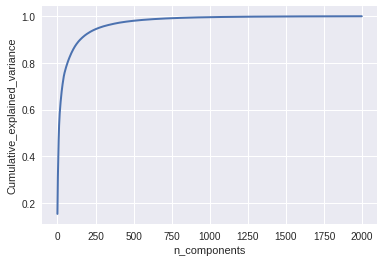

In [0]:

percentage_var_explained = svd.explained_variance_ / np.sum(svd.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)


plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [0]:
svd=TruncatedSVD(n_components=250, algorithm='randomized', n_iter=5, random_state=0, tol=0.0)
svd_data = svd.fit_transform(np.array(mat))

In [0]:
svd_data.shape

(2000, 250)

In [0]:
word_representation=pd.DataFrame(svd_data,index=importent_features)

In [0]:
word_representation.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
tast,19867.851188,-9392.463216,-9185.686962,16733.948963,1333.374574,-1613.922750,2017.205236,853.913298,1097.993164,941.720914,...,1.188717,-7.265348,7.426074,8.853884,2.038570,-1.968914,-10.007642,-3.924317,-5.111808,4.745529
like,18176.675242,-11587.669187,19070.585302,-1226.902196,-1960.026390,141.428067,-2084.050209,-243.311207,-239.864113,-366.978368,...,3.062527,-2.432549,5.211404,-3.384309,0.546428,-3.606825,-2.320437,-1.511029,2.029414,-2.823657
good,11117.953339,72.133948,-5681.124213,-3315.888183,-4671.581243,17627.393415,-3236.459497,-784.945450,-855.328827,-1386.916494,...,-3.103802,0.196042,2.149655,-1.808167,-0.459241,0.043089,0.893593,-0.846437,3.595545,1.132492
great,9708.345237,663.042864,-5817.894817,-3243.333243,-886.272399,-7775.811348,-10925.060983,-4186.895673,-8204.975787,-5360.663146,...,-2.008131,-1.042687,4.738072,-0.852068,1.746520,-0.826273,-0.621527,3.705752,2.352314,-3.748202
love,8162.171842,1946.523810,-2351.628411,-4474.893086,-904.163180,-3123.765228,2406.948280,-10378.644905,11865.776486,-3250.740832,...,12.789917,-0.433712,3.232849,2.059955,3.656571,2.281351,-4.634361,-4.611442,2.088368,-3.155611


In [0]:
from sklearn.cluster import KMeans


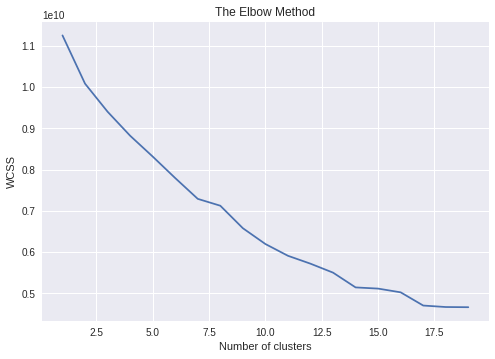

In [0]:
wcss=[]
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 0)
  kmeans.fit(svd_data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [0]:
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state = None)
kmeans.fit(svd_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
word_representation['cluster']=kmeans.labels_


In [0]:
word_representation['cluster'].value_counts()

0    1987
3      11
2       1
1       1
Name: cluster, dtype: int64

Word cloud for cluster 0


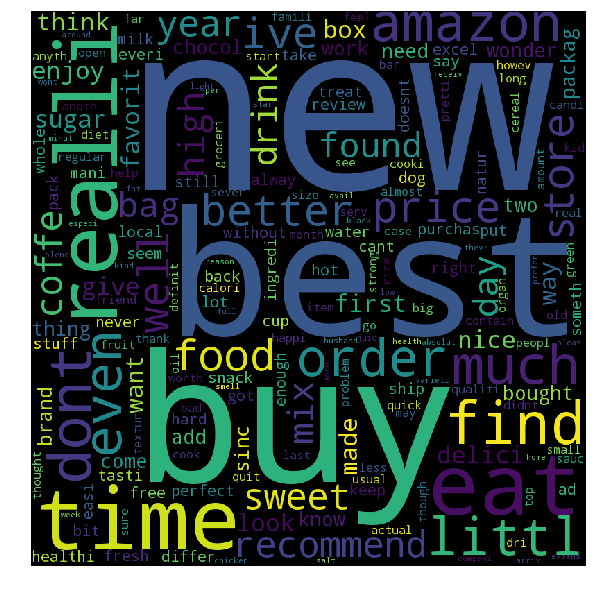

Word cloud for cluster 3


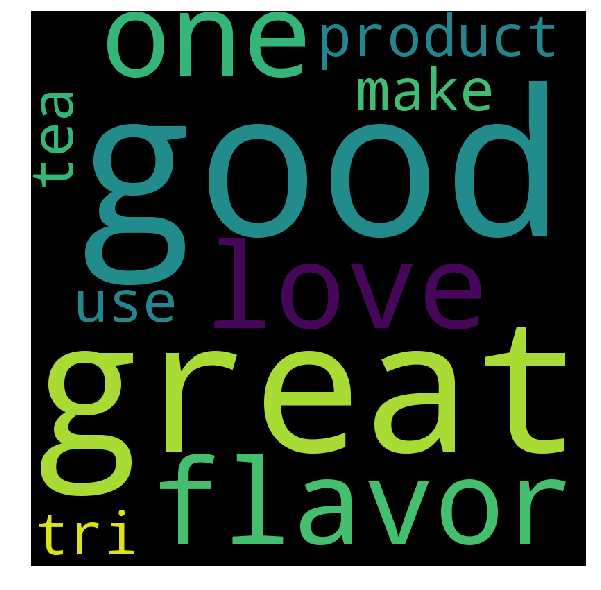

Word cloud for cluster 1


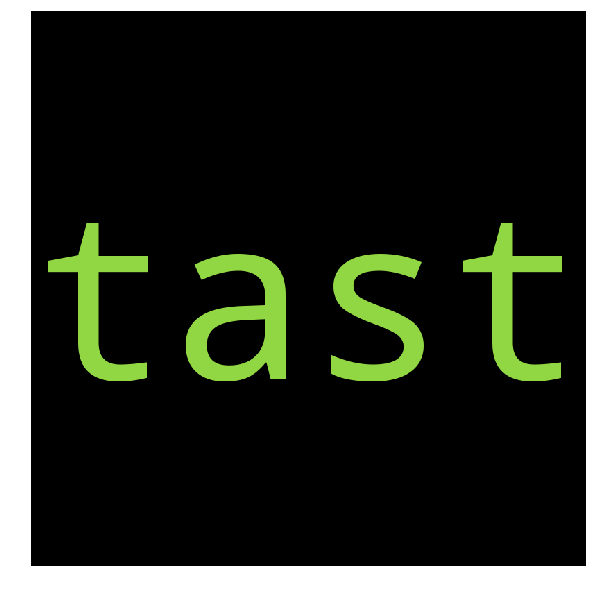

In [0]:
from wordcloud import WordCloud, STOPWORDS
for j in [0,3,1]:
  DF = word_representation[word_representation['cluster']==j]
  comment_words=' '
  for val in DF.index:
    comment_words = comment_words + val + ' '
  print("Word cloud for cluster "+ str(j))
  wordcloud = WordCloud(width = 800, height = 800, background_color ='black', min_font_size =5,max_words =200).generate(comment_words)
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

In [0]:
def compute_similarity(Word):
  dataSetI=word_representation.loc[Word].values
  similarities=[]
  for val in word_representation.index:
    dataSet2=word_representation.loc[val].values
    result = spatial.distance.cosine(dataSetI, dataSet2)
    similarities.append(result)
  indices=np.array(similarities).argsort()
  index=indices[-10:]
  return np.take((word_representation.index).tolist(),index)
  

In [0]:
compute_similarity("love")

array(['contain', 'juic', 'sea', 'fat', 'listmania', 'virgin', 'tran',
       'hydrogen', 'fructos', 'satur'], dtype='<U11')

In [0]:
compute_similarity("price")

array(['minut', 'water', 'fat', 'juic', 'chicken', 'skim', 'virgin',
       'fructos', 'satur', 'tran'], dtype='<U11')

##Conclusion

**No Of Importent Words Considered are 2000 for calculating co-occurence Matrix**

**Vectorizing Each word  Using TruncatedSVD**

**250 Dimensions are considered for each word by plotting Explained Varience Ratio  **

**No of Clusters Obtained by Using K-Means are 4**

*buy, best, new, food, order, realli, time are some importent words in cluster 0*

*flavor, good, product, tea, make, love, are some importent words in cluster 1*

*tast importent word in cluster 2*

